### COMP 4432 Maching Learning
### Assignment 4
### Megan Hoeksema

### Packages

In [275]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

### Assignment 4, Part 1: Data Exploration
- Read in bike_share_hour.csv as a pandas dataframe. The columns are described in the bike_share_readme.txt if you need more information about them.
- Look at the dataset, and convert the columns that are categorical to a pandas “category” type.
- Look for non-null values in the dataset.
- Do a descriptive analysis of the numeric columns.
- Implement a bar plot of cnt versus season. Document which season has the most bike rides and which season has the least.
- Implement a bar chart for working day versus count. Document how bike rides are distributed across these two classes.
- Implement a bar chart for month versus count. Document which months have the most bike rides.
- Implement code to figure out which months belong to which seasons.
- Implement a bar plot of weathersit versus cnt. Document which weather situation has less bike rentals.
- Implement a point plot of weathersit on the x-axis, count on the y-axis, and the season as the hue. Document how season and weathersit are related.
- Implement a bar plot of hour versus count. Are there any specific hours that are busier than others?
- Implement a bar plot of hour versus count on weekends and holidays (when workingday = 0). Does the hourly trend change on weekends?

In [224]:
# Read in bike_share_hour.csv as a pandas dataframe.
bikeDF = pd.read_csv('bike_share_hour.csv')
bikeDF.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [225]:
# Look at the dataset types
bikeDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [226]:
# convert the columns that are categorical to a pandas “category” type.
bikeDF = bikeDF.astype({"season":'category', "workingday":'category', "weathersit":'category', 'dteday':'category',
                        'yr':'category', 'mnth':'category','hr':'category','holiday':'category','weekday':'category' })

bikeDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     17379 non-null  int64   
 1   dteday      17379 non-null  category
 2   season      17379 non-null  category
 3   yr          17379 non-null  category
 4   mnth        17379 non-null  category
 5   hr          17379 non-null  category
 6   holiday     17379 non-null  category
 7   weekday     17379 non-null  category
 8   workingday  17379 non-null  category
 9   weathersit  17379 non-null  category
 10  temp        17379 non-null  float64 
 11  atemp       17379 non-null  float64 
 12  hum         17379 non-null  float64 
 13  windspeed   17379 non-null  float64 
 14  casual      17379 non-null  int64   
 15  registered  17379 non-null  int64   
 16  cnt         17379 non-null  int64   
dtypes: category(9), float64(4), int64(4)
memory usage: 1.3 MB


In [227]:
# Look for non-null values in the dataset.
bikeDF.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [228]:
# Do a descriptive analysis of the numeric columns.
bikeDF.describe()

,instant,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


<AxesSubplot:xlabel='season', ylabel='cnt'>

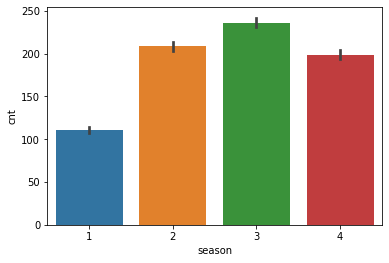

In [229]:
# Implement a bar plot of cnt versus season. Document which season has the most bike rides and which season has the least.
sns.barplot(x = 'season', y = 'cnt', data = bikeDF)

1:spring, 2:summer, 3:fall, 4:winter

The season with the most bike rides is fall (3) and the season with the least bike rides is spring (1). 

<AxesSubplot:xlabel='workingday', ylabel='cnt'>

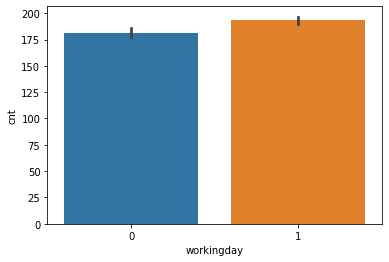

In [230]:
# Implement a bar chart for working day versus count. Document how bike rides are distributed across these two classes.
sns.barplot(x = 'workingday', y = 'cnt', data = bikeDF)

if day is neither weekend nor holiday is 1, otherwise is 0.

The number of bike rides that take place during the week (1) are higher than that of a weekend/holiday, however, not by much. One could argue that there is no significant difference between the number of bike rides that take place during the week vs. the weekend/holiday.

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

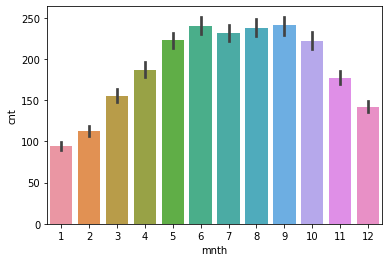

In [231]:
# Implement a bar chart for month versus count. Document which months have the most bike rides.
sns.barplot(x = 'mnth', y = 'cnt', data = bikeDF)

In [232]:
# Implement code to figure out which months belong to which seasons.
pd.crosstab(bikeDF['mnth'],bikeDF['season'])

season,1,2,3,4
mnth,,,,
1,1429,0,0,0
2,1341,0,0,0
3,949,524,0,0
4,0,1437,0,0
5,0,1488,0,0
6,0,960,480,0
7,0,0,1488,0
8,0,0,1475,0
9,0,0,1053,384


There is some overlap between months. For instances, month 3 is divided (not-evenly) between season 1 (Spring) and season 2 (Summer).
- Season 1 (Spring) contains months 1, 2, 3 and 12
- Season 2 (Summer) contains months 3, 4, 5, and 6
- Season 3 (Fall) contains months 6, 7, 8, and 9
- Season 4 (Winter) contains months 9, 10, 11 and 12

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

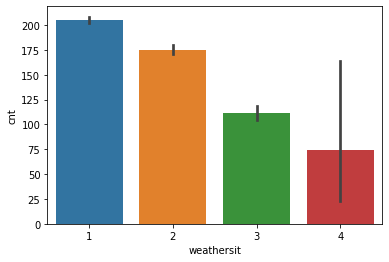

In [233]:
# Implement a bar plot of weathersit versus cnt. Document which weather situation has less bike rentals.
sns.barplot(x = 'weathersit', y = 'cnt', data = bikeDF)

Weathersit Information from readme:
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

Based on the above bar plot, There are less bike rentals when the weather situation is a situtation of 4 from the description above however there is a very large error bar.

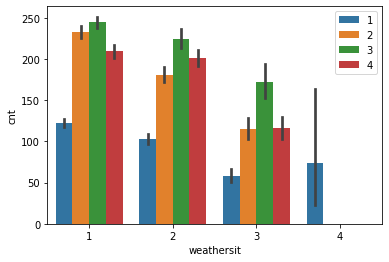

In [234]:
# Implement a point plot of weathersit on the x-axis, count on the y-axis, and the season as the hue. 
# Document how season and weathersit are related.

sns.barplot(x = 'weathersit', y = 'cnt', hue = 'season', data = bikeDF)
plt.legend(loc="upper right")
plt.show()

<AxesSubplot:xlabel='hr', ylabel='cnt'>

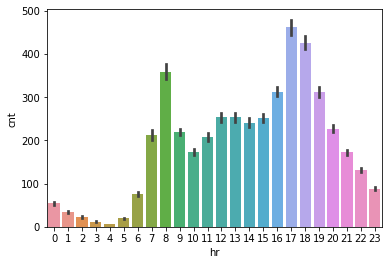

In [235]:
# Implement a bar plot of hour versus count. Are there any specific hours that are busier than others?
sns.barplot(x = 'hr', y = 'cnt', data = bikeDF)

The peak of bike rentals is at hour 17.

In [236]:
# Implement a bar plot of hour versus count on weekends and holidays (when workingday = 0). 
# Does the hourly trend change on weekends?
df2 = bikeDF[bikeDF['workingday'] == 0]
df2

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17350,17351,2012-12-30,1,1,12,19,0,0,0,1,0.34,0.3636,0.61,0.0000,16,86,102
17351,17352,2012-12-30,1,1,12,20,0,0,0,1,0.22,0.1970,0.47,0.3284,9,63,72
17352,17353,2012-12-30,1,1,12,21,0,0,0,1,0.20,0.2121,0.51,0.1642,5,42,47
17353,17354,2012-12-30,1,1,12,22,0,0,0,1,0.20,0.1970,0.55,0.1940,6,30,36


<AxesSubplot:xlabel='hr', ylabel='cnt'>

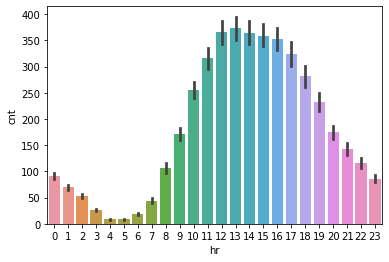

In [237]:
sns.barplot(x = 'hr', y = 'cnt', data = df2)

When changing the plot from all days to only weekends/holidays, the plot does change. The plot shows a nice curve with the peak rentals between the 11th and 17th hour.

### Assignment 4, Part 2: Data Preparation
- Implement and graph a correlation matrix with the remaining numeric features. Any interesting relationships?
- Scale the numerical features using StandardScaler(), and replace the original columns in your dataframe.
- Drop the following columns from your dataset: casual, registered, dteday, instant.
- Implement a histogram of the count column. What can be said based on the resulting distribution?
- Implement a train/test split with a test size of 33%.
- Implement a baseline linear regression algorithm. Use cross-validation to output r2 and mse. Calculate RMSE base on mse. Document your scores.

<function matplotlib.pyplot.show(close=None, block=None)>

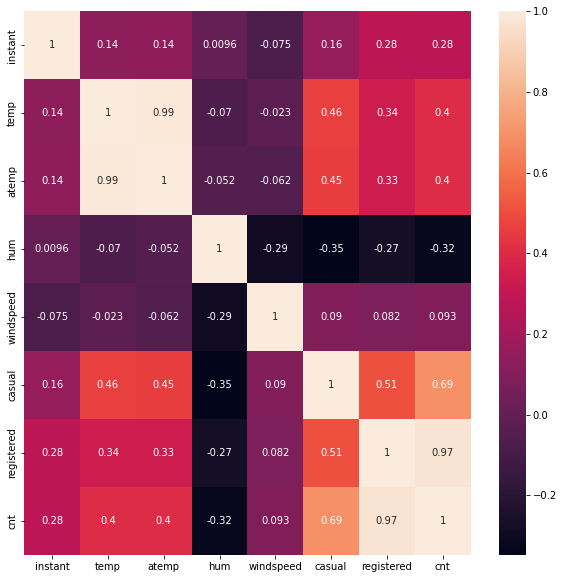

In [238]:
# Implement and graph a correlation matrix with the remaining numeric features. Any interesting relationships?

corr_matrix = bikeDF.corr()
heatmap = plt.figure(figsize = (10,10))
ax = sns.heatmap(corr_matrix, annot = True)
plt.show

Strong positive correlations: temp with atemp, registered with cnt
Strong negative correlations: hum with windspeed, hum with cnt

In [239]:
# Scale the numerical features using StandardScaler(), and replace the original columns in your dataframe.

scaler = StandardScaler()
numeric_cols = list(bikeDF.dtypes[bikeDF.dtypes != 'category'].index)
bikeDF.loc[:,numeric_cols] = scaler.fit_transform(bikeDF.loc[:,numeric_cols])

bikeDF.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,-1.731951,2011-01-01,1,0,1,0,0,6,0,1,-1.334648,-1.093281,0.947372,-1.553889,-0.662755,-0.930189,-0.956339
1,-1.731752,2011-01-01,1,0,1,1,0,6,0,1,-1.438516,-1.181732,0.895539,-1.553889,-0.561343,-0.804655,-0.824022
2,-1.731552,2011-01-01,1,0,1,2,0,6,0,1,-1.438516,-1.181732,0.895539,-1.553889,-0.622190,-0.837690,-0.868128
3,-1.731353,2011-01-01,1,0,1,3,0,6,0,1,-1.334648,-1.093281,0.636370,-1.553889,-0.662755,-0.950010,-0.972879
4,-1.731154,2011-01-01,1,0,1,4,0,6,0,1,-1.334648,-1.093281,0.636370,-1.553889,-0.723603,-1.009474,-1.039037


In [240]:
# Drop the following columns from your dataset: casual, registered, dteday, instant.
bikeDF = bikeDF.drop(columns = ['casual', 'registered', 'dteday', 'instant'])
bikeDF.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,-1.334648,-1.093281,0.947372,-1.553889,-0.956339
1,1,0,1,1,0,6,0,1,-1.438516,-1.181732,0.895539,-1.553889,-0.824022
2,1,0,1,2,0,6,0,1,-1.438516,-1.181732,0.895539,-1.553889,-0.868128
3,1,0,1,3,0,6,0,1,-1.334648,-1.093281,0.636370,-1.553889,-0.972879
4,1,0,1,4,0,6,0,1,-1.334648,-1.093281,0.636370,-1.553889,-1.039037


<AxesSubplot:xlabel='cnt', ylabel='Count'>

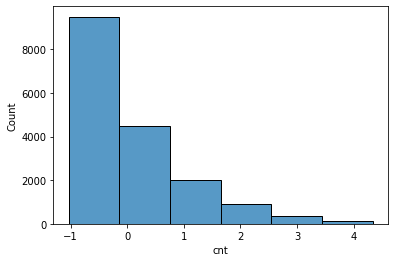

In [241]:
# Implement a histogram of the count column. What can be said based on the resulting distribution?
sns.histplot(bikeDF, x="cnt", bins = 6)

In [242]:
# Implement a train/test split with a test size of 33%.
bikeDF_train, bikeDF_test = train_test_split(bikeDF, test_size=0.33)
print("Sizes of training and test sets:", [len(elem) for elem in [bikeDF_train, bikeDF_test]])

bikeDF_train_labels = bikeDF_train['cnt']
bikeDF_train_features = bikeDF_train.drop(columns = ['cnt'])

Sizes of training and test sets: [11643, 5736]


In [243]:
# Implement a baseline linear regression algorithm. Use cross-validation to output r2 and mse. Calculate RMSE base on mse. 
# Document your scores.

lr = LinearRegression()
lr.fit(bikeDF_train_features, bikeDF_train_labels)
lrPreds = lr.predict(bikeDF_train_features)

lr_mse = mean_squared_error(bikeDF_train_labels, lrPreds)
lr_rmse = np.sqrt(lr_mse)
print('LR RMSE: ', lr_rmse)

lr_r2 = r2_score(bikeDF_train_labels, lrPreds)
print('LR r2: ', lr_r2)

scores = cross_val_score(lr, bikeDF_train_features, bikeDF_train_labels, scoring = 'neg_mean_squared_error', cv = 10)

rmse_scores = np.sqrt(-scores)
print('\nScores:', rmse_scores)

print('\nMean:', rmse_scores.mean())
print('SD:', rmse_scores.std())

LR RMSE:  0.7787901545923686
LR r2:  0.3872689247913913

Scores: [0.78113734 0.81964437 0.75889552 0.75588213 0.78129423 0.80725186
 0.76430253 0.79042591 0.76524426 0.76912   ]

Mean: 0.7793198153051073
SD: 0.020077272476021927


### Assignment 4, Part 3: Model Training (Hint: trained all of these with a for loop and added my results to a PrettyTable.)
- Create one-hot-encoded values for your categorical columns using get_dummies and add them to your source dataset.
- Drop the original categorical columns from your source dataset.
- Do a test/train split based on your new source dataset. Implement and fit a new linear model on your new training set.
- What are the new values for r2, mse, and rmse?
- Implement and score a decision tree regressor with random_state=0.
- Implement and score a RandomForestRegressor with random_state=0 and n_esitmators=30.
- Implement and score an SGDRegressor with max_iter=1000 and tol=1e-3).
- Implement and score a Lasso Regressor with alpha=0.1.
- Implement and score an ElasticNet Regressor with random_state=0.
- Implement and score a Ridge Regressor with alpha=0.5.
- Implement and score a BaggingRegressor.

In [244]:
bikeDF.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,-1.334648,-1.093281,0.947372,-1.553889,-0.956339
1,1,0,1,1,0,6,0,1,-1.438516,-1.181732,0.895539,-1.553889,-0.824022
2,1,0,1,2,0,6,0,1,-1.438516,-1.181732,0.895539,-1.553889,-0.868128
3,1,0,1,3,0,6,0,1,-1.334648,-1.093281,0.636370,-1.553889,-0.972879
4,1,0,1,4,0,6,0,1,-1.334648,-1.093281,0.636370,-1.553889,-1.039037


In [248]:
# Create one-hot-encoded values for your categorical columns using get_dummies and add them to your source dataset. 
# Drop the original categorical columns from your source dataset.
bikeDF_dummy = pd.get_dummies(bikeDF, columns = ['season', 'workingday', 'weathersit', 'yr', 'hr', 'holiday', 'weekday'])
bikeDF_dummy.head()

,mnth,temp,atemp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,...,hr_23,holiday_0,holiday_1,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,1,-1.334648,-1.093281,0.947372,-1.553889,-0.956339,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,1,-1.438516,-1.181732,0.895539,-1.553889,-0.824022,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,1,-1.438516,-1.181732,0.895539,-1.553889,-0.868128,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,1,-1.334648,-1.093281,0.636370,-1.553889,-0.972879,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,1,-1.334648,-1.093281,0.636370,-1.553889,-1.039037,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [299]:
# Do a test/train split based on your new source dataset. 
train, test = train_test_split(bikeDF_dummy, test_size=0.33)
print("Sizes of training and test sets:", [len(elem) for elem in [train, test]])

train_labels = train['cnt']
train_features = train.drop(columns = ['cnt'])

test_labels = test['cnt']
test_features = test.drop(columns = ['cnt'])

Sizes of training and test sets: [11643, 5736]


In [252]:
# Implement and fit a new linear model on your new training set.

lr = LinearRegression()
lr.fit(train_features, train_labels)
lrPreds = lr.predict(train_features)

In [253]:
# What are the new values for r2, mse, and rmse?
lr_mse = mean_squared_error(train_labels, lrPreds)
lr_rmse = np.sqrt(lr_mse)
print('LR MSE: ', lr_mse)
print('LR RMSE: ', lr_rmse)

lr_r2 = r2_score(train_labels, lrPreds)
print('LR r2: ', lr_r2)

LR MSE:  0.31086283895101857
LR RMSE:  0.5575507501125064
LR r2:  0.6852959320829703


In [254]:
# Implement and score a decision tree regressor with random_state=0.
tree_reg = DecisionTreeRegressor(random_state=0).fit(train_features, train_labels)
treePreds = tree_reg.predict(train_features)

tree_mse = mean_squared_error(train_labels, treePreds)
tree_rmse = np.sqrt(tree_mse)
print('Decision Tree MSE: ', tree_mse)
print('Decision Tree RMSE: ', tree_rmse)

tree_r2 = r2_score(train_labels, treePreds)
print('Decision Tree r2: ', tree_r2)

Decision Tree MSE:  6.526568744441402e-08
Decision Tree RMSE:  0.00025547150025866686
Decision Tree r2:  0.9999999339278461


In [257]:
# Implement and score a RandomForestRegressor with random_state=0 and n_esitmators=30.
forest = RandomForestRegressor(random_state = 0, n_estimators = 30).fit(train_features, train_labels)
forestPreds = forest.predict(train_features)

forest_mse = mean_squared_error(train_labels, forestPreds)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest MSE: ', forest_mse)
print('Random Forest RMSE: ', forest_rmse)

forest_r2 = r2_score(train_labels, forestPreds)
print('Randomm Forest r2: ', forest_r2)

Random Forest MSE:  0.012637097414378533
Random Forest RMSE:  0.11241484516903688
Randomm Forest r2:  0.9872067501654794


In [263]:
# Implement and score an SGDRegressor with max_iter=1000 and tol=1e-3).
sgd = SGDRegressor(max_iter=1000, tol=1e-3).fit(train_features, train_labels)
sgdPreds = sgd.predict(train_features)

sgd_mse = mean_squared_error(train_labels, sgdPreds)
sgd_rmse = np.sqrt(sgd_mse)
print('SGD MSE: ', sgd_mse)
print('SGD RMSE: ', sgd_rmse)

sgd_r2 = r2_score(train_labels, sgdPreds)
print('SGD r2: ', sgd_r2)

SGD MSE:  0.3171542926554262
SGD RMSE:  0.5631645342663423
SGD r2:  0.6789267369724518


In [265]:
# Implement and score a Lasso Regressor with alpha=0.1.
lasso = Lasso(alpha = 0.1).fit(train_features, train_labels)
lassoPreds = lasso.predict(train_features)

lasso_mse = mean_squared_error(train_labels, lassoPreds)
lasso_rmse = np.sqrt(lasso_mse)
print('Lasso MSE: ', lasso_mse)
print('Lasso RMSE: ', lasso_rmse)

lasso_r2 = r2_score(train_labels, lassoPreds)
print('Lasso r2: ', lasso_r2)

Lasso MSE:  0.744158346215647
Lasso RMSE:  0.8626461303545313
Lasso r2:  0.2466463359894433


In [266]:
# Implement and score an ElasticNet Regressor with random_state=0.
elastic = ElasticNet(random_state = 0).fit(train_features, train_labels)
elasticPreds = elastic.predict(train_features)

elastic_mse = mean_squared_error(train_labels, elasticPreds)
elastic_rmse = np.sqrt(elastic_mse)
print('Elastic Net MSE: ', elastic_mse)
print('Elastic Net RMSE: ', elastic_rmse)

elastic_r2 = r2_score(train_labels, elasticPreds)
print('Elastic Net r2: ', elastic_r2)

Elastic Net MSE:  0.9877941553427144
Elastic Net RMSE:  0.9938783403126936
Elastic Net r2:  0.0


In [267]:
# Implement and score a Ridge Regressor with alpha=0.5.
ridge = Ridge(alpha = 0.5).fit(train_features, train_labels)
ridgePreds = ridge.predict(train_features)

ridge_mse = mean_squared_error(train_labels, ridgePreds)
ridge_rmse = np.sqrt(ridge_mse)
print('Ridge MSE: ', ridge_mse)
print('Ridge RMSE: ', ridge_rmse)

ridge_r2 = r2_score(train_labels, ridgePreds)
print('Ridge r2: ', ridge_r2)

Ridge MSE:  0.3108645367129648
Ridge RMSE:  0.5575522726282844
Ridge r2:  0.685294213342343


In [269]:
# Implement and score a BaggingRegressor.
br = BaggingRegressor().fit(train_features, train_labels)
brPreds = br.predict(train_features)

br_mse = mean_squared_error(train_labels, brPreds)
br_rmse = np.sqrt(br_mse)
print('Bagging MSE: ', br_mse)
print('Bagging RMSE: ', br_rmse)

br_r2 = r2_score(train_labels, brPreds)
print('Bagging r2: ', br_r2)

Bagging MSE:  0.01689549167933682
Bagging RMSE:  0.12998265914858342
Bagging r2:  0.9828957363353957


### Assignment 4, Part 4: Model Tuning
- Take the top three performing models and implement cross-validation on them.
    - Hint: They should be Decision Tree Regressor, RandomForestRegressor, and BaggingRegressor.
- Take your top performing model (mine was the RandomForestRegressor) and do a randomize search cv with 20 iterations and three folds.
    - I found it is best to set your n_jobs = (# of cpu’s you have – 1). This took about 10 minutes on my MacBook with 4 CPUs and 8 GB of memory.
- Your param distributions should include the following:
    - Bootstrap: true, false
    - Max_depth: 10-110, number of bins 11
    - Max_features: auto, sqrt
    - Min_samples_split: 2,5,10
    - Min_samples_leaf: 1,2,4
    - N_estimators: 200 – 2000, number of bins 10
- Take your best_estimator_ and see how it compares by doing cross_vals for r2, mse, and calculating rmse.
- Finally, run predictions on your test set with this model, and see how your r2 score and RMSE look.

In [271]:
# Implement cross-validation on Decision Tree Regressor.
tree_scores = cross_val_score(tree_reg, train_features, train_labels, scoring = 'neg_mean_squared_error', cv = 10)

tree_rmse_scores = np.sqrt(-tree_scores)
print('\nScores:', tree_rmse_scores)

print('\nMean:', tree_rmse_scores.mean())
print('SD:', tree_rmse_scores.std())


Scores: [0.43187578 0.3773094  0.38742748 0.400786   0.39077234 0.42208875
 0.38389914 0.38672982 0.44977734 0.41638981]

Mean: 0.4047055862459503
SD: 0.02285387643192476


In [273]:
# Implement cross-validation on Random Forest Regressor.
forest_scores = cross_val_score(forest, train_features, train_labels, scoring = 'neg_mean_squared_error', cv = 10)

forest_rmse_scores = np.sqrt(-forest_scores)
print('\nScores:', forest_rmse_scores)

print('\nMean:', forest_rmse_scores.mean())
print('SD:', forest_rmse_scores.std())


Scores: [0.30510872 0.27059312 0.29441554 0.3030161  0.27493422 0.31767606
 0.28574748 0.2930625  0.31272227 0.28983978]

Mean: 0.2947115791656528
SD: 0.014520875448473606


In [274]:
# Implement cross-validation on Bagging Regressor.
br_scores = cross_val_score(br, train_features, train_labels, scoring = 'neg_mean_squared_error', cv = 10)

br_rmse_scores = np.sqrt(-br_scores)
print('\nScores:', br_rmse_scores)

print('\nMean:', br_rmse_scores.mean())
print('SD:', br_rmse_scores.std())


Scores: [0.31428495 0.2738204  0.3046857  0.30970287 0.28385206 0.32123782
 0.3083379  0.31453054 0.33985381 0.30024182]

Mean: 0.307054786483285
SD: 0.01757462655691078


In [290]:
# Take your top performing model and do a randomize search cv with 20 iterations and three folds

bootstrap = [True, False]
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
max_features = ['auto', 'sqrt']
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
n_estimators = np.linspace(200, 2000, int((2000-200)/200) + 1, dtype=int)

random_grid = {'bootstrap': bootstrap, 'max_depth': max_depth, 'max_features': max_features, 
               'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf, 'n_estimators': n_estimators}

rf_random = RandomizedSearchCV(estimator = forest, param_distributions = random_grid, n_iter = 20, cv = 3)

rf_random.fit(train_features, train_labels)

/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behav

/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behav

RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(n_estimators=30,
                                                   random_state=0),
                   n_iter=20,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([ 200,  400,  600,  800, 1000, 1200, 1400, 1600, 1800, 2000])})

In [291]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=90, max_features='auto', n_estimators=1000,
                      random_state=0)

In [292]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 90,
 'bootstrap': True}

In [295]:
# Take your best_estimator_ and see how it compares by doing cross_vals for r2, mse, and calculating rmse.
bestEst = RandomForestRegressor(max_depth=90, max_features='auto', n_estimators=1000, random_state=0)
bestEst.fit(train_features, train_labels)

bestEst_scores = cross_val_score(bestEst, train_features, train_labels, scoring = 'neg_mean_squared_error', cv = 10)

bestEst_rmse_scores = np.sqrt(-bestEst_scores)
print('\nScores:', bestEst_rmse_scores)

print('\nMean:', bestEst_rmse_scores.mean())
print('SD:', bestEst_rmse_scores.std())

/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behav


Scores: [0.29508747 0.26577747 0.2854919  0.29057169 0.27157081 0.30525633
 0.28190049 0.28735093 0.30689579 0.28461015]

Mean: 0.2874513035065983
SD: 0.012360554426008752


In [303]:
# Finally, run predictions on your test set with this model, and see how your r2 score and RMSE look.
bestEst.fit(test_features, test_labels)
bestEstPreds = bestEst.predict(test_features)

mse = mean_squared_error(test_labels, bestEstPreds)
rmse = np.sqrt(mse)
print('MSE: ', mse)
print('RMSE: ', rmse)

r2 = r2_score(test_labels, bestEstPreds)
print('r2: ', r2)

/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


MSE:  0.014897922909114455
RMSE:  0.12205704776502853
r2:  0.9852322319034377
